# Create your first wordcloud


In this first chapter of the Intro to NLP course, you learn how to load a page from wikipedia and create a wordcloud.

Let's start by installing the [wordcloud](https://github.com/amueller/word_cloud) library

In [1]:
!pip install wordcloud

# Content from wikipedia

Wikipedia is a great source of quality text.
We use the Wikipedia API to get the text of a page given its title


In [8]:
# 1) import the necessary library
import requests

# 2) set the title of the page (uncomment to change the page)
title = 'Earth'

# 3) send a request to the wikipedia api
# asking to return content of the page formatted as json

response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params={
        'action': 'query',
        'format': 'json',
        'titles': title,
        'prop': 'extracts',
        'explaintext': True,
    }).json()

# 4) Parse the result and extract the text
page = next(iter(response['query']['pages'].values()))
text = page['extract']


In [9]:
# print the 1st 300 characters from the text
print(text[:300])

Earth is the third planet from the Sun and the only astronomical object known to harbor life. This is enabled by Earth being a water world, the only one in the Solar System sustaining liquid surface water. Almost all of Earth's water is contained in its global ocean, covering 70.8% of Earth's surfac


Let's wrap the code to get text from wikipedia into a convenient function

In [10]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a wikipedia page title
    '''
    params = {
        'action': 'query',
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts',
        'explaintext': True
    }
    # send a request to the wikipedia api
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"



In [11]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Earth').lower()
print(text)

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface water. almost all of earth's water is contained in its global ocean, covering 70.8% of earth's surface. the remaining 29.2% of earth's surface is land, most of which is located in the form of continental landmasses within one hemisphere, earth's land hemisphere. most of earth's land is somewhat humid and covered by vegetation, while large sheets of ice at earth's polar deserts retain more water than earth's groundwater, lakes, rivers and atmospheric water together. earth's land is part of earth's crust, consisting of several slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. inside earth's crust is a liquid outer core that generates the magnetosphere, deflecting most of the destructive solar winds and cosmic radiation.
earth has a dynamic a

# Create a wordcloud
We use the [wordcloud](https://github.com/amueller/word_cloud) library.

Modify the parameters to get different results (size, max_words, ...)

The Wordcloud library comes with its own list of stopwords. To disable it we set the list of stopwords to be empty.

            stopwords = []

In [12]:
stopwords = []

# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 600,
        height= 300,
        max_words = 300,
        stopwords = [])

# Apply the wordcloud to the text.
wordcloud.generate(text)

We use matplotlib to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

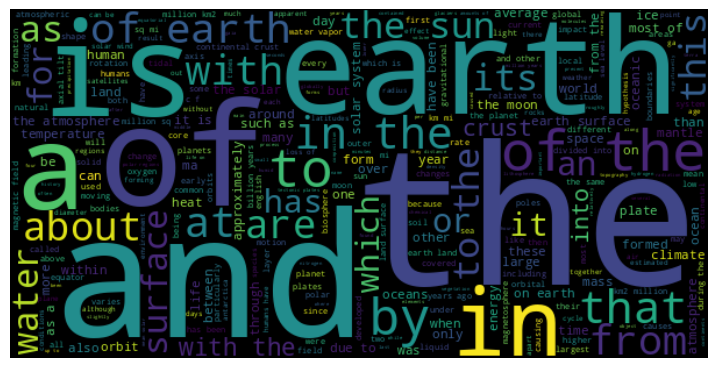

In [13]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

We mostly see stopwords: _the_  _of_  _by_ _in_ etc ...

To get rid of these stopwords, we build a new wordcloud, this time without setting the stopword parameter to an empty list.

(-0.5, 799.5, 399.5, -0.5)

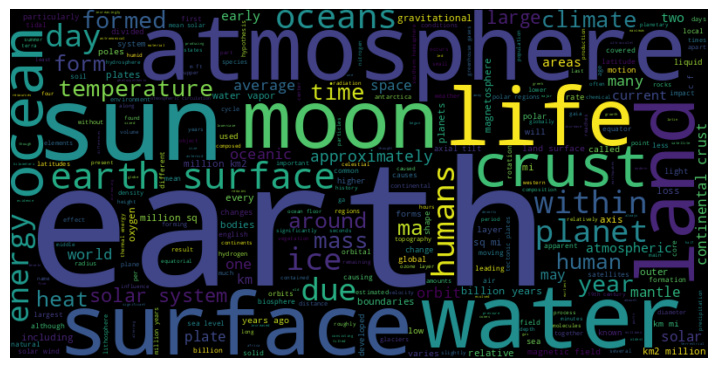

In [14]:
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800,
        height= 400,
        max_words = 300)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

A wordcloud which is much more representative of the Earth wikipedia page.

Let's see what we get for another page, ... for instance [New York](https://en.wikipedia.org/wiki/New_York)

(-0.5, 799.5, 399.5, -0.5)

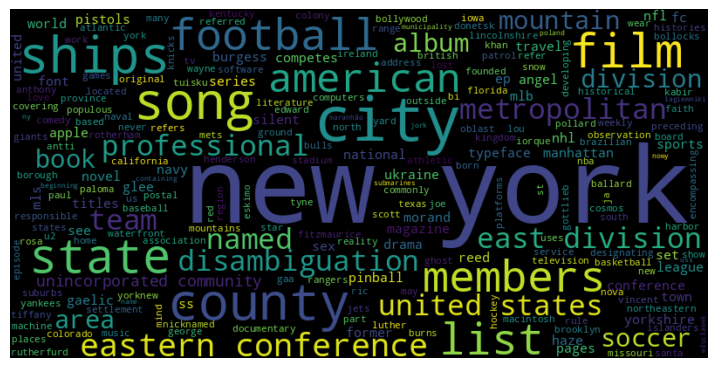

In [19]:
# Text
text = wikipedia_page('New_York').lower()
# Wordcloud
wordcloud = WordCloud(

        random_state = 8,
        normalize_plurals = False,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Change Background and Make a mask!


You get the gist :)

# Gutenberg project

The [Gutenberg project](https://www.gutenberg.org) is another great source of text.


In [ ]:
import requests
# this is the url for Frankenstein, by Mary Wollstonecraft Shelley
frankenstein_url = 'https://www.gutenberg.org/files/84/84-0.txt'

# this is the url for Alice in Wonderland by Lewis Carroll
alice_url = 'http://www.gutenberg.org/files/11/11-0.txt'

# get the text from Alice in Wonderland
r = requests.get(alice_url)

# remove the header, the footer and some weird characters
text = ' '.join(r.text.split('***')[1:])
text = text.split("END OF THE PROJECT GUTENBERG")[0]
text = text.encode('ascii',errors='ignore').decode('utf-8')
print(text)

In [ ]:

# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = True,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# and the Frankenstein Wordcloud

import requests
# this is the url for Frankenstein, by Mary Wollstonecraft Shelley
frankenstein_url = 'https://www.gutenberg.org/files/84/84-0.txt'

# get the text from Alice in Wonderland
r = requests.get(frankenstein_url)

# remove the header, the footer and some weird characters
text = ' '.join(r.text.split('***')[1:])
text = text.split("END OF THE PROJECT GUTENBERG")[0]
text = text.encode('ascii',errors='ignore').decode('utf-8')
print(text)

In [ ]:
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = True,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")